### Bondgo simple example ###

This is the usal way to import the BondMachine toolkit into your python environment.

In [1]:
import os
BONDMACHINE_DIR="/home/"+os.environ["USER"]+"/bin"
os.environ["BONDMACHINE_DIR"]=BONDMACHINE_DIR
os.environ["PATH"]=os.environ["PATH"]+":"+os.environ["BONDMACHINE_DIR"]

In [2]:
os.environ['XILINX_HLS'] = '/tools/Xilinx/Vitis_HLS/2023.2'
os.environ['XILINX_VIVADO'] = '/tools/Xilinx/Vivado/2023.2'
os.environ['XILINX_VITIS'] = '/tools/Xilinx/Vitis/2023.2'
os.environ['PATH']=os.environ["PATH"]+":"+os.environ['XILINX_HLS']+"/bin:"+os.environ['XILINX_VIVADO']+"/bin:"+os.environ['XILINX_VITIS']+"/bin:"

Let's import also some other useful libraries as display.

In [3]:
from IPython import display

In [4]:
!bmhelper doctor

 [ OK ] 	 Mandatory dependency found: make
 [ OK ] 	 Mandatory dependency found: dot
 [ OK ] 	 Mandatory dependency found: curl
 [ OK ] 	 BondMachine tool basm found
 [ OK ] 	 BondMachine tool bmanalysis found
 [ OK ] 	 BondMachine tool bmnumbers found
 [ OK ] 	 BondMachine tool bmstack found
 [ OK ] 	 BondMachine tool bondgo found
 [ OK ] 	 BondMachine tool bondmachine found
 [ OK ] 	 BondMachine tool melbond found
 [ OK ] 	 BondMachine tool neuralbond found
 [ OK ] 	 BondMachine tool procbuilder found
 [ OK ] 	 BondMachine tool simbox found
 [ OK ] 	 All BondMachine tools has been found.
 [ OK ] 	 Optional tool found: vivado
 [ WARNING ] 	 Optional tool not found: yosis
 [ WARNING ] 	 Optional tool not found: icepack
 [ WARNING ] 	 Optional tool not found: quartus
 [ OK ] 	 Dependencies checked


Let's ckeck the project configuration.

In [5]:
%%bash
cat local.mk

WORKING_DIR=working_dir
CURRENT_DIR=$(shell pwd)
SOURCE_BASM=program.basm
BMINFO=bminfo.json
BOARD=alveou50
SHOWARGS=-dot-detail 5
SHOWRENDERER=dot -Txlib
VERILOG_OPTIONS=-comment-verilog
HWOPTIMIZATIONS=onlydestregs,onlysrcregs
BASM_ARGS=-dump-requirements $(WORKING_DIR)/requirements.json $(BMRANGES) -disable-dynamical-matching -chooser-min-word-size -chooser-force-same-name
BMREQS=$(WORKING_DIR)/requirements.json
PLATFORM=xilinx_u50_gen3x16_xdma_5_202210_1
MAPFILE=alveou50_maps.json
#HDL_REGRESSION=bondmachine.sv
#BM_REGRESSION=bondmachine.json
include bmapi.mk


There is a variable called `MAPFILE` that points to the map file, which is a json file that contains the information about how the BondMachine
is connected to the real world. Let's take a look at it.

In [6]:
!cat alveou50_maps.json

{
    "Assoc" : {
        "clk" : "clk",
        "reset" : "btnC"
        }
    }
    

As you can see, the project is configured to use the `bondgo` compiler as source way to compile the code.

In [7]:
%%bash
cat program.basm

%section code1 .romtext iomode:sync
        entry _start    ; Entry point
_start:
        clr     r0
loop:
        mov     r0, i0
        lfsr82r r0, lfsr80
        mov     o0, r0

        j loop

%endsection

%meta cpdef	cpu1	romcode: code1, ramsize:8
%meta sodef	videomemory    constraint:lfsr8:34
%meta soatt	videomemory cp: cpu1, index:0
%meta bmdef	global registersize:16
%meta ioatt     testioin cp: cpu1, index:0, type:input
%meta ioatt     testioin cp: bm, index:0, type:input
%meta ioatt     testioout cp: cpu1, index:0, type:output
%meta ioatt     testioout cp: bm, index:0, type:output


With the `bondmachine` target we can generate the corresponding bondmachine. This time the toolchain 
make use of the `bondgo` compiler to generate the bondmachine. The bondgo arg -d is used to specify the
activation of the debug mode.

In [10]:
%%bash
make bondmachine

[Project: 04_shared_object_alveou50] - [Working directory creation begin] - [Target: working_dir] 
mkdir -p working_dir
[Project: 04_shared_object_alveou50] - [Working directory creation end]

[Project: 04_shared_object_alveou50] - [BondMachine generation begin] - [Target: working_dir/bondmachine_target] 
basm -dump-requirements working_dir/requirements.json  -disable-dynamical-matching -chooser-min-word-size -chooser-force-same-name -bminfo-file bminfo.json -o working_dir/bondmachine.json  program.basm
[Project: 04_shared_object_alveou50] - [BondMachine generation end]



The debug mode shows how the compiler parses the code and generates the  AST (Abstract Syntax Tree) of the code and 
how it creates the bondmachine. Let's see the bondmachine.

[Project: 04_shared_object_alveou50] - [BondMachine diagram show begin] - [Target: show] 
bondmachine -bondmachine-file working_dir/bondmachine.json -emit-dot -dot-detail 5 -bminfo-file bminfo.json | dot -Tpng > working_dir/bondmachine.png
[Project: 04_shared_object_alveou50] - [BondMachine diagram show end]



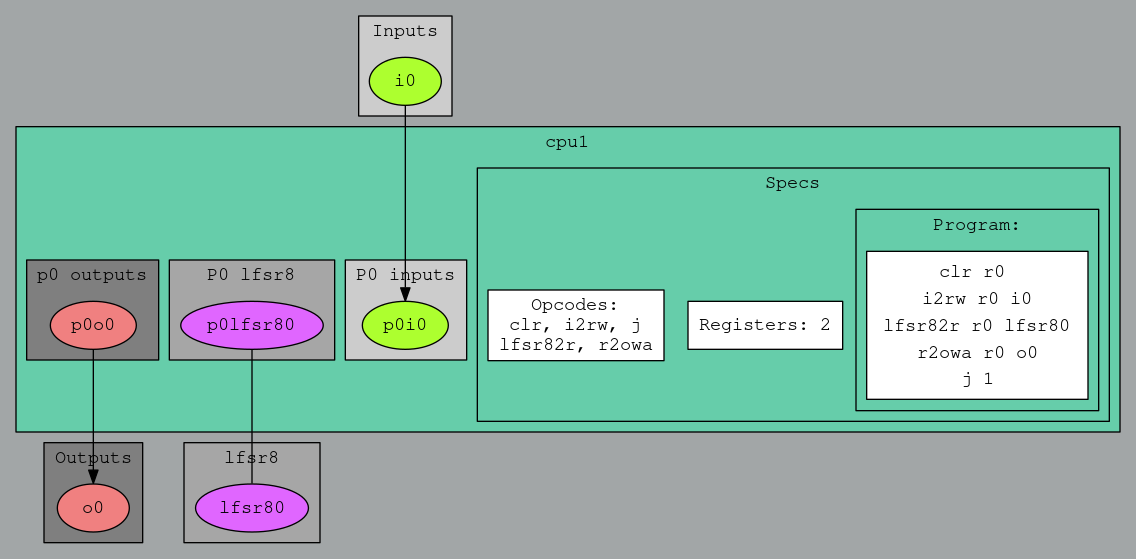

In [12]:
!SHOWRENDERER="dot -Tpng > working_dir/bondmachine.png" make show
display.Image("working_dir/bondmachine.png")

By taking a look at the ASM code, we can see that the there is not optimization.

In [21]:
!make apply

 [ WARNING ] 	 Doctor has detected a warning; Run the command 'bmhelper doctor' to get more details.
 [ OK ] 	 Workflow detected: basm.
 [ OK ] 	 Mandatory variable found SOURCE_BASM
 [ OK ] 	 Mandatory variable found WORKING_DIR
 [ OK ] 	 Mandatory variable found MAPFILE
 [ OK ] 	 Optional variable found: SHOWARGS
 [ OK ] 	 Source file program.basm found
 [ OK ] 	 Found target board: alveou50
 [ OK ] 	 Project has been successfully initialized.


Let's clean the workspace.

In [22]:
!make hdl

[Project: 04_shared_object_alveou50] - [Working directory creation begin] - [Target: working_dir] 
mkdir -p working_dir
[Project: 04_shared_object_alveou50] - [Working directory creation end]

[Project: 04_shared_object_alveou50] - [BondMachine generation begin] - [Target: working_dir/bondmachine_target] 
basm -dump-requirements working_dir/requirements.json  -disable-dynamical-matching -chooser-min-word-size -chooser-force-same-name -bminfo-file bminfo.json -o working_dir/bondmachine.json  program.basm
[Project: 04_shared_object_alveou50] - [BondMachine generation end]

[Project: 04_shared_object_alveou50] - [HDL generation begin] - [Target: working_dir/hdl_target] 
bondmachine -bondmachine-file working_dir/bondmachine.json -create-verilog -verilog-mapfile alveou50_maps.json -verilog-flavor alveou50          -use-bmapi -bmapi-flavor axist -bmapi-language python -bmapi-mapfile bmapi.json -bmapi-liboutdir working_dir/bmapi -bmapi-framework pynq -bmapi-flavor-version basic -bmapi-modoutd

In [ ]:
!make xclbin

In [20]:
!make clean

[Project: 04_shared_object_alveou50] - [Cleanup begin] - [Target: clean] 
rm -rf working_dir
rm -f vivado*
rm -f graphviz*
rm -rf ebcluster*
rm -f a.out*
rm -f .config.old
rm -f generated.mk
[Project: 04_shared_object_alveou50] - [Cleanup end]

